In [44]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from difflib import get_close_matches

In [45]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [46]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [47]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [48]:
print("\n--- First 5 rows of the dataset ---")
print(movies.head())


--- First 5 rows of the dataset ---
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [49]:
print("\n--- Dataset Info ---")
print(movies.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


In [50]:
print("\n--- Missing values in dataset ---")
print(movies.isnull().sum())


--- Missing values in dataset ---
movieId    0
title      0
genres     0
dtype: int64


In [51]:
print("\n--- First 5 rows of the dataset ---")
print(ratings.head())


--- First 5 rows of the dataset ---
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [52]:
print("\n--- Dataset Info ---")
print(ratings.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


In [53]:
print("\n--- Missing values in dataset ---")
print(ratings.isnull().sum())


--- Missing values in dataset ---
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


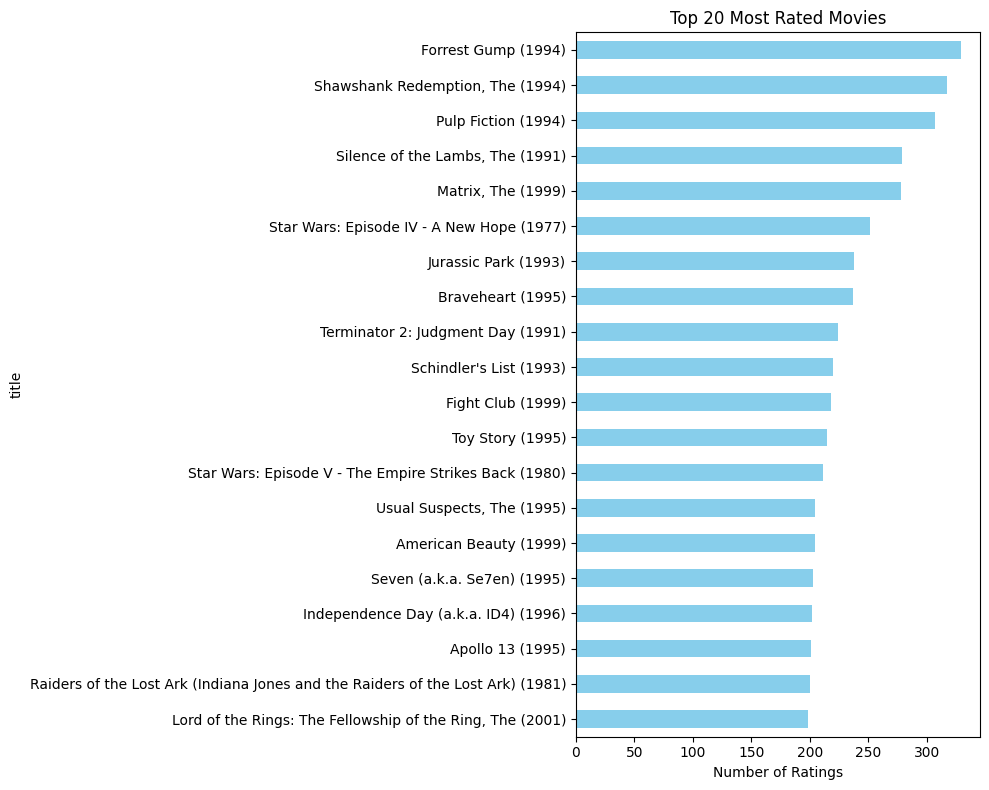

In [54]:
import matplotlib.pyplot as plt

# Histogram of ratings count
rating_counts = movie_data.groupby('title')['rating'].count()
rating_counts.sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.xlabel("Number of Ratings")
plt.title("Top 20 Most Rated Movies")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [55]:
# Merge datasets
movie_data = pd.merge(ratings, movies, on='movieId')

# Create pivot table (rows: users, columns: movies)
pivot_table = movie_data.pivot_table(index='userId', columns='title', values='rating')

# Fill NaNs with 0s
movie_matrix = pivot_table.fillna(0)

# Transpose to get movies as rows (for KNN)
movie_sparse = csr_matrix(movie_matrix.T.values)

# Build KNN model
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(movie_sparse)

# List of movie titles
movie_titles = list(movie_matrix.columns)


In [56]:
def recommend_movies(input_movie, k=5):
    matches = get_close_matches(input_movie, movie_titles, n=1)
    if not matches:
        return f"❌ Movie '{input_movie}' not found in database."

    movie = matches[0]
    print(f"🎬 Closest match found: {movie}")

    index = movie_titles.index(movie)
    distances, indices = model.kneighbors(movie_sparse[index], n_neighbors=k+1)

    print(f"\n📌 Top {k} movies similar to '{movie}':")
    for i in range(1, k+1):
        print(f"{i}. {movie_titles[indices[0][i]]} (Score: {1 - distances[0][i]:.2f})")

In [64]:

while True:
    user_input = input("\n🎥 Enter a movie name (or type 'exit' to quit): ").strip()
    if user_input.lower() == 'exit':
        print("👋 Exiting the recommender. Have a great day!")
        break
    recommend_movies(user_input, k=10)



🎥 Enter a movie name (or type 'exit' to quit):  Titanic


🎬 Closest match found: Titanic (1997)

📌 Top 10 movies similar to 'Titanic (1997)':
1. Men in Black (a.k.a. MIB) (1997) (Score: 0.55)
2. Star Wars: Episode I - The Phantom Menace (1999) (Score: 0.52)
3. Saving Private Ryan (1998) (Score: 0.51)
4. Shrek (2001) (Score: 0.51)
5. Catch Me If You Can (2002) (Score: 0.50)
6. Sixth Sense, The (1999) (Score: 0.49)
7. Truman Show, The (1998) (Score: 0.49)
8. Finding Nemo (2003) (Score: 0.49)
9. Good Will Hunting (1997) (Score: 0.49)
10. Pirates of the Caribbean: The Curse of the Black Pearl (2003) (Score: 0.48)



🎥 Enter a movie name (or type 'exit' to quit):  Captain

🎥 Enter a movie name (or type 'exit' to quit):  Captain America


🎬 Closest match found: Captain America (1990)

📌 Top 10 movies similar to 'Captain America (1990)':
1. Hardware (1990) (Score: 0.97)
2. Killshot (2008) (Score: 0.97)
3. Jack the Bear (1993) (Score: 0.97)
4. Janie Jones (2010) (Score: 0.97)
5. Karate Bullfighter (1975) (Score: 0.97)
6. Ernest Rides Again (1993) (Score: 0.97)
7. Pusher III: I'm the Angel of Death (2005) (Score: 0.97)
8. Pusher II: With Blood on My Hands (2004) (Score: 0.97)
9. Pusher (1996) (Score: 0.97)
10. Purgatory (1999) (Score: 0.97)



🎥 Enter a movie name (or type 'exit' to quit):  Game of thrones

🎥 Enter a movie name (or type 'exit' to quit):  Anabella

🎥 Enter a movie name (or type 'exit' to quit):  Mufasa

🎥 Enter a movie name (or type 'exit' to quit):  MUFASA

🎥 Enter a movie name (or type 'exit' to quit):  Gladiatot


🎬 Closest match found: Gladiator (2000)

📌 Top 10 movies similar to 'Gladiator (2000)':
1. Matrix, The (1999) (Score: 0.63)
2. Lord of the Rings: The Fellowship of the Ring, The (2001) (Score: 0.62)
3. Bourne Identity, The (2002) (Score: 0.60)
4. Saving Private Ryan (1998) (Score: 0.58)
5. Lord of the Rings: The Two Towers, The (2002) (Score: 0.58)
6. Fight Club (1999) (Score: 0.58)
7. Lord of the Rings: The Return of the King, The (2003) (Score: 0.58)
8. Ocean's Eleven (2001) (Score: 0.58)
9. X-Men (2000) (Score: 0.57)
10. Sixth Sense, The (1999) (Score: 0.57)



🎥 Enter a movie name (or type 'exit' to quit):  Indian Jones

🎥 Enter a movie name (or type 'exit' to quit):  The Wolf of wall street


🎬 Closest match found: Wolf of Wall Street, The (2013)

📌 Top 10 movies similar to 'Wolf of Wall Street, The (2013)':
1. Django Unchained (2012) (Score: 0.56)
2. Dark Knight Rises, The (2012) (Score: 0.54)
3. Shutter Island (2010) (Score: 0.54)
4. Mad Max: Fury Road (2015) (Score: 0.52)
5. Deadpool (2016) (Score: 0.52)
6. The Martian (2015) (Score: 0.52)
7. Her (2013) (Score: 0.51)
8. Big Short, The (2015) (Score: 0.49)
9. Girl with the Dragon Tattoo, The (2011) (Score: 0.49)
10. Ex Machina (2015) (Score: 0.49)



🎥 Enter a movie name (or type 'exit' to quit):  Aquman

🎥 Enter a movie name (or type 'exit' to quit):  aqaman

🎥 Enter a movie name (or type 'exit' to quit):  Fast and Furious


🎬 Closest match found: Fast and the Furious, The (2001)

📌 Top 10 movies similar to 'Fast and the Furious, The (2001)':
1. Gone in 60 Seconds (2000) (Score: 0.55)
2. Lara Croft: Tomb Raider (2001) (Score: 0.54)
3. Training Day (2001) (Score: 0.54)
4. Final Fantasy: The Spirits Within (2001) (Score: 0.52)
5. 2 Fast 2 Furious (Fast and the Furious 2, The) (2003) (Score: 0.52)
6. Rundown, The (2003) (Score: 0.51)
7. American Pie 2 (2001) (Score: 0.50)
8. Black Hawk Down (2001) (Score: 0.50)
9. Dodgeball: A True Underdog Story (2004) (Score: 0.49)
10. Knight's Tale, A (2001) (Score: 0.48)



🎥 Enter a movie name (or type 'exit' to quit):  exit


👋 Exiting the recommender. Have a great day!
